In [93]:
using Plots, NearestNeighborModels, MLJBase, CategoricalArrays

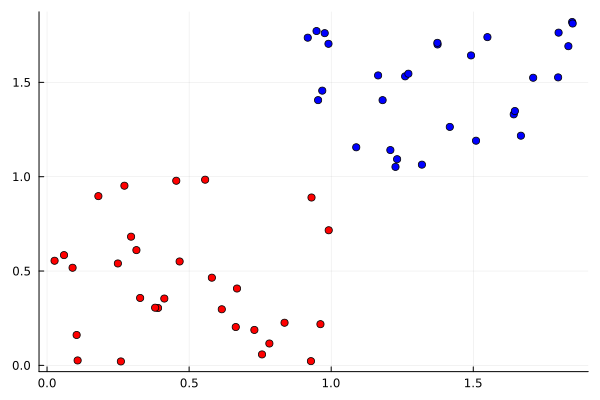

In [94]:
n = 30 

x1 = vcat(rand(n), rand(n) .+ 0.90);
x2 = vcat(rand(n), rand(n) .+ 0.90);

cols = vcat([:red for i in 1:n], [:blue for i in 1:n])

scatter(x1, x2, color = cols, legend = false)

In [95]:
X = (x1 = x1, x2 = x2)
y = vcat(["A" for i in 1:n], ["B"  for i in 1:n]);
classes = CategoricalArray(y)
display(hcat(x1, x2, classes))

60×3 Matrix{Any}:
 0.466567   0.550706   "A"
 0.928711   0.0225159  "A"
 0.259835   0.020969   "A"
 0.99126    0.716147   "A"
 0.327618   0.357313   "A"
 0.0898824  0.517429   "A"
 0.782444   0.115977   "A"
 0.454761   0.978519   "A"
 0.314542   0.610891   "A"
 0.664155   0.203233   "A"
 0.668492   0.407395   "A"
 0.104117   0.161101   "A"
 0.0264979  0.554545   "A"
 ⋮                     
 1.4174     1.26384    "B"
 1.37435    1.70081    "B"
 0.917531   1.73676    "B"
 1.23195    1.09281    "B"
 0.968574   1.45601    "B"
 1.31925    1.06382    "B"
 1.26027    1.53186    "B"
 1.27163    1.54582    "B"
 1.71081    1.5244     "B"
 1.37372    1.70942    "B"
 0.953916   1.40578    "B"
 1.79862    1.52633    "B"

In [96]:
train_inds, test_inds = partition(1:nrows(X), 0.7, shuffle=true);
@info "Train indices"
display(train_inds')
@info "Test indices"
display(test_inds')

[ Info: Train indices


1×42 adjoint(::Vector{Int64}) with eltype Int64:
 60  8  5  53  59  30  14  55  56  42  …  4  51  11  40  26  39  50  37  33

[ Info: Test indices


1×18 adjoint(::Vector{Int64}) with eltype Int64:
 24  58  23  15  12  6  32  46  9  45  49  29  34  35  47  20  52  38

In [97]:
knnc = KNNClassifier() 

KNNClassifier(
  K = 5, 
  algorithm = :kdtree, 
  metric = Euclidean(0.0), 
  leafsize = 10, 
  reorder = true, 
  weights = Uniform())

In [98]:
# Fitting the model
knnc_mach = machine(knnc, X, classes) 
fit!(knnc_mach, rows=train_inds)

[ Info: Training machine(KNNClassifier(K = 5, …), …).


trained Machine; caches model-specific representations of data
  model: KNNClassifier(K = 5, …)
  args: 
    1:	Source @627 ⏎ Table{AbstractVector{Continuous}}
    2:	Source @555 ⏎ AbstractVector{Multiclass{2}}


In [99]:
expected = classes[test_inds]
p = predict_mode(knnc_mach, rows=test_inds)
@info "Real and predicted classes"
display([expected, p])

[ Info: Real and predicted classes


2-element Vector{CategoricalVector{String, UInt32, String, CategoricalValue{String, UInt32}, Union{}}}:
 ["A", "B", "A", "A", "A", "A", "B", "B", "A", "B", "B", "A", "B", "B", "B", "A", "B", "B"]
 ["B", "B", "A", "A", "A", "A", "B", "B", "A", "B", "B", "A", "B", "B", "B", "A", "B", "B"]